# **FastText Word Embeddings**

## Abstract

In 2016, the Word2Vec model had proven its usefulness in many areas of NLP. However, there was one unsolved problem: generalization to unknown words. FastText — a development by Facebook released in 2016 in the paper titled [Enriching Word Vectors with Subword Information](https://arxiv.org/abs/1607.04606) — promised to overcome this obstacle. This notebook aims to provide a background for the state of language representation at the time and explore the FastText paper and its implementations.

## Table of Contents

>[FastText Word Embeddings](#scrollTo=1mo_OS8fVeEV)

>>[Abstract](#scrollTo=K_N_isQ2VpSZ)

>>[Table of Contents](#scrollTo=eHY1ajU6WQy9)

>>[Introduction](#scrollTo=5LRNpGBQ7Er7)

>>[Localist Representation of Words Meaning](#scrollTo=4a4yAebkYI9F)

>>[Distributed Representation of Words Meaning](#scrollTo=cGZ-J5-zaIaI)

>>>[The Distributional Hypothesis](#scrollTo=cGZ-J5-zaIaI)

>>>[Word Vectors/Embeddings](#scrollTo=cGZ-J5-zaIaI)

>>>[Neural Language Models](#scrollTo=cGZ-J5-zaIaI)

>>>[Self-Supervision](#scrollTo=cGZ-J5-zaIaI)

>>[Word2Vec](#scrollTo=ALC1VKFfVrts)

>>>[Continuous Bag-of-Words and Continuous Skip-gram Models](#scrollTo=_oyGp4cdmtjM)

>>>[Word2Vec Limitation](#scrollTo=gUX-t1LLVUTX)

>>[GloVe](#scrollTo=GCoETjNYWM62)

>>>[Raw Probabilities Vs Probability Ratios](#scrollTo=q_oZTpjziHMC)

>>>[From Metric to Word Vectors](#scrollTo=dgsikwAlmmX-)

>>>[Linearity of Word Vectors' Spaces](#scrollTo=FkG-g1JmrAu1)

>>>[Dimensionality Mismatch](#scrollTo=f2Crcbt8zc5y)

>>>[The Function $F$](#scrollTo=K_nIyg1j1ohZ)

>>>[The Loss Function $J$](#scrollTo=rOs0zsPz6-e9)

>>[Downloading Pretrained GloVe Embeddings](#scrollTo=MTQVWOouAcGT)

>>[References](#scrollTo=nPM1YWVmkKba)



## Introduction

Language Representation refers to the numerical encoding of natural language, which is an essential step in any NLP pipeline as machine learning methods only deal with numeric entites. For instance, neural networks only accept vectorized inputs. Thus, when processing images, they can be represented as flattened one-dimensional vectors of all their pixel values. This encoding creates a vector space where similar images have similar corresponding vectors. The figure below shows that increasing the brightness of an image, results in the same vector of the original image with a larger magnitude.




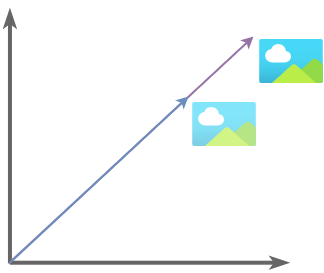

Similarly, the goal of language representation is to encode natural language (terms or documents) in a vector space where similar vectors correspond to similar pieces of text, as shown in the figure below.

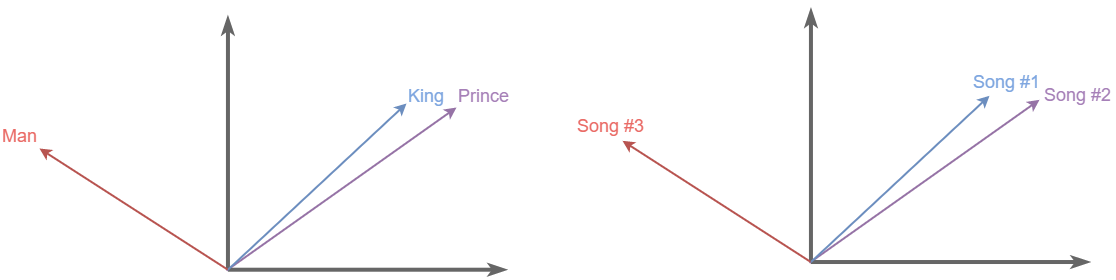

## Localist Representation of Words Meaning

The problem with traditional NLP approaches to implementing “meaning” is that words are regarded, and represented, as discrete/atomic units, such as one-hot encoded word vectors. 

There are two main issues with this approach:
- Vectors Efficiency

  The vectors’ lengths are equal to the number of words in our vocabulary (curse of dimensionality).
- Vectors Orthogonality

  There isn’t a natural notion of similarity between one-hot encoded vectors (curse of orthogonality). 

Therefore, the goal is to densly encode words in a multidimensional semantic vector space that satisfies the two following criteria:
- Its dimensions are reasonably limited.
- It possesses a natural notion of similarity between vectors.




## Distributed Representation of Words Meaning

### The Distributional Hypothesis

The distributional hypothesis suggests that the more semantically similar two words are, the more distributionally similar they will be, and consequently, the more they will tend to occur in similar linguistic contexts.

### Word Vectors/Embeddings

This idea of distributional semantics, which is the notion that a word’s meaning is given by the words that frequently appear close by, is exploited to produce word embeddings that encode similarity in the vectors themselves.

> “You shall know a word by the company it keeps.”

When a word $w$ appears in a text, its context is the set of words that appear nearby, within a fixed-sized window. Thus, by representing context words as vectors, a dense real-valued vector can be built up for each word, chosen so that it is similar to vectors of words that appear in similar contexts, and thus represents the meaning of that word by way of distributional semantics. 

### Neural Language Models

Representation of words as continuous vectors has a long history. A very popular model architecture for estimating neural network language model ([NNLM](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)) was proposed in 2003 by Bengio et al. at the University of Montreal, where a feedforward neural network with a linear projection layer and a non-linear hidden layer was used to learn jointly the word vector representation and a statistical language model. This work has been followed by many others.

These models learn simultaneously:
- A distributed representation for each word.
- The probability function for word sequences.

Generalization is obtained because a sequence of words that has never been seen before gets high probability if it is made of words that are similar (in the sense of having a nearby representation) to words forming an already seen sentence. After the model training, the learned weights are saved as the word-embeddings. 

### Self-Supervision

The revolutionary intuition here is the use of running text as implicitly  supervised training data for such a classifier. This method, often called self-supervision, avoids the need for any hand-labelled supervision signal. This idea was first proposed in the task of neural language modelling when Bengio et al. (2003) showed that a neural language model (a neural network that learned to predict the next word from previous ones) could use the next word in running text as its supervision signal, and could be used to learn an embedding representation for each word as part of doing this prediction task.



## Word2Vec

The [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/abs/1301.3781) paper was published by Google in 2013. The paper proposed two novel model architectures for efficiently computing continuous vector representations of words from very large data sets. 

Word2Vec is much simpler than the neural network language model (Bengio et al. 2003) in two ways:

- First, word2vec simplifies the prediction task (making it binary classification instead of vocabulary softmax prediction).  This is achieved by negative sampling instead of applying a softmax layer, which is computationally more expensive.

- Second, word2vec simplifies the architecture (training a logistic regression classifier instead of a multi-layer neural network with hidden layers that demand more sophisticated training algorithms).

Thus, word2vec models are shallow, two-layer neural networks, trained to reconstruct linguistic contexts of words. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in it. 

Word vectors are positioned in the vector space such that words that share similar contexts in the corpus are located close to one another in the semantic space.



### Continuous Bag-of-Words and Continuous Skip-gram Models

Word2vec can utilize either of two model architectures to produce a distributed representation of words: continuous bag-of-words (CBOW) or continuous skip-gram. 
- In the continuous bag-of-words architecture, the model predicts the current word from a window of surrounding context words. The order of context words does not influence prediction (bag-of-words assumption). 
- In the continuous skip-gram architecture, the model uses the current word to predict the surrounding window of context words. The skip-gram architecture weighs nearby context words more heavily than more distant context words.

According to the authors' note, CBOW is faster while skip-gram performs better for infrequent words.

### Word2Vec Limitation

The Word2Vec model suffers from the disadvantage that it does not operate directly on the co-occurrence statistics of the corpus. Instead, it scans context windows across the entire corpus, which fails to take advantage of the vast amount of repetition in the data. In other words, Word2Vec relies only on local information of language. That is, the semantics learnt for a given word, is only affected by the surrounding words.



## GloVe

> The statistics of word occurrences in a corpus is the primary source of information available to all unsupervised methods for learning word representations, and although many such methods now exist, the question still remains as to how meaning is generated from these statistics, and how the resulting word vectors might represent that meaning. In this section, we shed some light on this question. We use our insights to construct a new model for word representation which we call GloVe, for Global Vectors, because the global corpus statistics are captured directly by the model.

The core idea of the GloVe model is the obtainment of semantic relationships between words from the word-word co-occurrence matrix, denoted as $X$. 

- Given a corpus having $V$ words, the word-word co-occurrence matrix $X$ will be a $V$x$V$, whose entries $X_{ij}$ denotes the the number of times word $j$ occurs in the context of word $i$. 
- Thus, $X_i=\sum_kX_{ik}$ denotes the number of times any word appears in the context of word $i$. 
- Finally, let $P_{ij}=P(j|i)=\frac{X_{ij}}{X_i}$ be the probability that word $j$ appear in the context of word $i$.



For example, given the corpus: "I love nlp very much":-

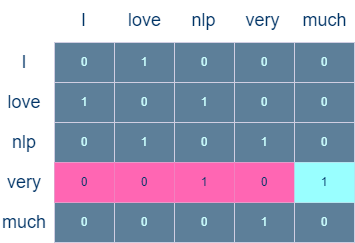

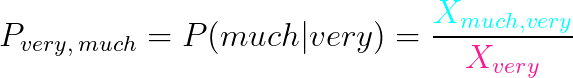

### Raw Probabilities Vs Probability Ratios

Consider two words $i = ice$ and $j = steam$. The relationship of these words can be examined by studying the ratio of their co-occurrence probabilities with various probe words, $k$.

- For words $k$ related to $ice$ but not $steam$, say $k = solid$, we
expect the ratio $\frac{P_{ik}}{P_{jk}}$ will be large. This is because the $k$ is much more likely to be a context word of $i$ than in $j$.

- Similarly, for words $k$ related to $steam$ but not $ice$, say $k =
gas$, the ratio should be small. 

- For words $k$ like $water$ or $fashion$, that are either related to both $ice$
and $steam$, or to neither, the ratio should be close to one.

Compared to the raw probabilities, the ratio is better able to distinguish relevant words ($solid$ and $gas$) from irrelevant words ($water$ and $fashion$) and it is also better able to discriminate between the two relevant words. This means that incorporating the ratio $\frac{P_{ik}}{P_{jk}}$ (rather than the raw probabilities) in the computation of word vectors, we will be achieving the goal of using global statistics when learning word vectors.

### From Metric to Word Vectors

Noting that the ratio $\frac{P_{ik}}{P_{jk}}$ depends on three words $i$, $j$, and $k$, the most general model takes the form:

<center><h4>$F(w_i, w_j, \tilde w_k) = \frac{P_{ik}}{P_{jk}}$</center>

Where, $w \in R^d$ are word vectors and $\tilde w \in R^d$ are separate context word vectors. 

Thus, there are two main issues to get from the probability ratios metric to word vectors:

1. The dimensionality mismatch between the length of word vectors and the scalar probability ratio.
2. The complication of computing a loss function with three words instead of two.

Solving these issues provides us a method to compute global word vectors.

### Linearity of Word Vectors' Spaces

Word vector spaces are inherently linear structures. For example:

$w_{king} — w_{male} + w_{female} = w_{queen}$

This allows us to change to form of the function $F$ to:

<center><h4>$F(w_i - w_j, \tilde w_k) = \frac{P_{ik}}{P_{jk}}$</center>



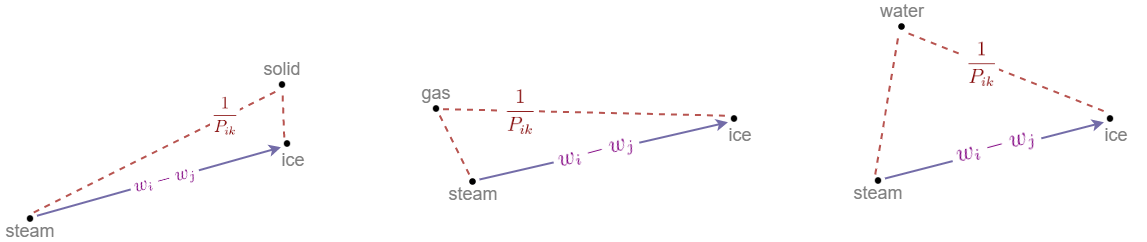

### Dimensionality Mismatch

The arguments of the function $F$ are vectors while the right-hand side is a scalar. This dimensionality mismatched is solved by taking the dot product of the arguments:

<center><h2>$F((w_i - w_j)^T \tilde w_k) = \frac{P_{ik}}{P_{jk}}$</center>


### The Function $F$

Next, we require that $F$ be a homomorphism between the additive group $(R,+)$ and the multiplicative group $(R>0, ×)$, i.e.,
<center><h2>$F((w_i - w_j)^T \tilde w_k) = \frac{{F(w_i^T \tilde w_k)}}{{F(w_j^T \tilde w_k)}}$</center>

Therefore,
<center><h2>$F(w_i^T \tilde w_k) = P_{ik} = \frac{X_{ik}}{X_i}$</center>

The function is then assumed to be an exponential $F = exp$, which satisfies the homomorphism property defined above. 
<center><h2>$exp(w_i^T \tilde w_k) = P_{ik} = \frac{X_{ik}}{X_i}$</center>
<center><h2>$w_i^T \tilde w_k = ln(P_{ik}) = ln(\frac{X_{ik}}{X_i}) = ln(X_{ik}) - ln(X_i)$</center>
<center><h2>$w_i^T \tilde w_k + ln(X_i) = ln(X_{ik})$</center>

The above equation would have symmetry if not for the term $ln(X_i)$, i.e. $i$ and $k$ can be swapped. Because this term is independent of $k$, we can add a bias $b_i$ which would absorb $ln(X_i)$ and add another $b_k$ to restore symmetry. 
<center><h2>$w_i^T \tilde w_k + b_i + \tilde b_k = ln(X_{ik})$</center>



### The Loss Function $J$

In an ideal setting, where we have perfect word vectors, the expression 
<h2>$w_i^T \tilde w_k + b_i + \tilde b_k - ln(X_{ik})$

will be zero. In other words, that’s our goal or objective. So we will be setting this expression as our cost function.

<h2>$J(w_i, w_j)= (w_i * \tilde w_j + b_i + \tilde b_j - ln(X_{ij}))^2$

The above loss function has the issue of being undefined at $X_{ij} = 0$. This can be easily solved with Laplacian smoothing, i.e. $ln(1+X_{ij})$. Instead, the GloVe paper proposes a weighting function $f(X_{ij})$.

The weighting function obeys the following properties:
1. $f (0) = 0$. If $f$ is viewed as a continuous
function, it should vanish as $x \rightarrow 0$ fast
enough that the $\lim_{x \rightarrow 0} (f(x) * ln^2x)$ is finite.

2. $f (x)$ should be non-decreasing so that rare
co-occurrences are not overweighted.

3. $f (x)$ should be relatively small for large values of x, so that frequent co-occurrences are
not overweighted.


## FastText

> Continuous word representations, trained on large unlabeled corpora are useful for many natural language processing tasks. Popular models that learn such representations ignore the morphology of words, by assigning a distinct vector to each word. This is a limitation, especially for languages with large vocabularies and many rare words. In this paper, we propose a new approach based on the skipgram model, where each word is represented as a bag of character n-grams. A vector representation is associated to each character n-gram; words being represented as the sum of these representations.

The core idea of FastText is very similar to the Word2Vec model. However, because the word2vec model uses the words in corpus to build the word embeddings, and assigns a distinct vector to each word, it ignores the internal structure of words, which is an important limitation for morphologically rich languages. FastText enriches the word2vec embeddings by taking into account subword information.


### Subword Information

Each word $w$ is represented as a bag of character n-grams. Special boundary  symbols $<$ and $>$ are added at the beginning and end of words, to distinguish prefixes and suffixes from other character sequences. The word $w$ itself is included in the set of its n-grams, to learn a representation for each
word (in addition to character n-grams). 

Taking the word $where$ and $n = 3$ as an example, it will be represented by the character n-grams:

$<wh, whe, her, ere, re>$

and the special sequence

$<where>$.

The word embeddings outputted by FastText look very similar to the ones provided by Word2Vec. However, they are not calculated directly. Instead, they are a combination of the lower-level embeddings.

### FastText Advantages

There are two main advantages to this approach. First, generalization is possible as long as new words have the same subwords as known ones. Second, less training data is needed since much more information can be extracted from each piece of text.

## Pretrained FastText Embeddings

### Imports

In [2]:
import io
import os
import re

from zipfile import ZipFile
from urllib.request import urlretrieve

### Downloading the Pretrained FastText Embeddings

In [ ]:
# Specify the URL to download the word embeddings
embeddings_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip"

# Specify the working and embeddings directories' paths
working_directory = os.getcwd()
embeddings_directory = os.path.join(working_directory, "embeddings")

# Download the embeddings as a .zip file
zipfile_path = f"{working_directory}/wiki-news-300d-1M.vec.zip"
if not os.path.exists(zipfile_path):
  print("Downloading the Word Embeddings...")
  urlretrieve(embeddings_url, zipfile_path)

# Extract the embeddings in /embeddings/
if not os.path.exists(embeddings_directory):
  print("Extracting the Word Embeddings...")
  with ZipFile(zipfile_path) as zip_file:
    zip_file.extractall(embeddings_directory)

print("FastText Embeddings are ready.")

### Loading the FastText Word Vectors

In [4]:
def load_vectors(fname):
  fin = io.open(fname, "r", encoding="utf-8", newline="\n", errors="ignore")
  n, d = map(int, fin.readline().split())
  data = {}
  for line in fin:
      tokens = line.rstrip().split(" ")
      data[tokens[0]] = map(float, tokens[1:])
  return data

In [ ]:
embeddings_model_name = "wiki-news-300d-1M.vec"
fasttext_model = load_vectors(os.path.join(embeddings_directory, embeddings_model_name))

## References

1. The FastText Paper: [Enriching Word Vectors with Subword Information](https://arxiv.org/abs/1607.04606)

2. FastText Documentation: [English Word Vectors](https://fasttext.cc/docs/en/english-vectors.html)